## Partial derivative equations

A linear equation is defined as:

$$ y(x_{0},x_{1},\ldots,x_{n}) = b + m_{0} x_{0} + m_{1} x_{1} + \ldots + m_{n} x_{n} $$

To simplify, let's consider one slope `m` and one intercept `b`:

$$ y(x) = b + m x $$

Loss function is defined as:

$$ L(b,m)
 = \frac{1}{2N} \sum_{i=1}^N (y(x_{i}) - y_{i})^2
 = \frac{1}{2N} \sum_{i=1}^N (b + m x_{i} - y_{i})^2 $$

Let

$$ g(x) = \frac{1}{2N} \sum_{i=1}^N x^2 $$

$$ f(b,m) = b + m x_{i} - y_{i}  $$

Then we can rewrite loss function as:

$$ L(b,m) = \frac{1}{2N} \sum_{i=1}^N f(b,m)^2 = g(f(b,m)) $$

To calculate the gradient, we use chain rule:

$$ \frac{\partial}{\partial x} g(x)
 = \frac{\partial}{\partial x} (\frac{1}{2N} \sum_{i=1}^N x^2)
 = \frac{2}{2N} \sum_{i=1}^N x 
 = \frac{1}{N} \sum_{i=1}^N x $$

$$ \frac{\partial}{\partial b} f(b,m)
 = \frac{\partial}{\partial b} (b + m x_{i} - y_{i}) 
 = b^0 + 0 - 0
 = 1 $$

$$ \frac{\partial}{\partial m} f(b,m) 
 = \frac{\partial}{\partial m} (b + m x_{i} - y_{i})
 = 0 + x_{i} m^0 - 0
 = x_{i} $$

$$ \frac{\partial}{\partial b} L(b,m)
 = \frac{\partial}{\partial b} g(f(b,m))
 = \frac{\partial}{\partial b} g(f(b,m)) \cdot \frac{\partial}{\partial b} f(b,m)
 = \frac{\partial}{\partial b} g(b + m x_{i} - y_{i}) \cdot \frac{\partial}{\partial b} f(m,b)
 = \frac{1}{N} \sum_{i=1}^N (b + m x_{i} - y_{i}) $$

$$ \frac{\partial}{\partial m} L(b,m)
 = \frac{\partial}{\partial m} g(f(b,m))
 = \frac{\partial}{\partial m} g(f(b,m)) \cdot \frac{\partial}{\partial m} f(b,m)
 = \frac{\partial}{\partial m} g(b + m x_{i} - y_{i}) \cdot \frac{\partial}{\partial m} f(m,b)
 = \frac{1}{N} \sum_{i=1}^N (b + m x_{i} - y_{i}) x_{i} $$


In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation, rc
from sklearn.linear_model import LinearRegression
from IPython.display import HTML

## Function to calculate loss

$$ L(b,m) = \frac{1}{2N} \sum_{i=1}^N (b + m x_{i} - y_{i})^2 $$

In [2]:
def loss(b, m, sample_x, sample_y):
    total_error = 0.0
    n = len(sample_x)
    for i in range(0, n):
        x = sample_x[i]
        y = sample_y[i]
        total_error += (b + m * x - y) ** 2
    return total_error / (2.0 * float(n))

## Function to calculate gradient

$$ \frac{\partial}{\partial b} L(b,m) = \frac{1}{N} \sum_{i=1}^N (b + m x_{i} - y_{i}) $$

$$ \frac{\partial}{\partial m} L(b,m) = \frac{1}{N} \sum_{i=1}^N (b + m x_{i} - y_{i}) x_{i} $$

In [3]:
def gradient(b, m, sample_x, sample_y):
    gradient_b = 0.0
    gradient_m = 0.0
    n = len(sample_x)
    for i in range(0, n):
        x = sample_x[i]
        y = sample_y[i]
        tmp = b + m * x - y
        gradient_b += tmp
        gradient_m += tmp * x
    gradient_b = gradient_b / (float(n))
    gradient_m = gradient_m / (float(n))
    return gradient_b, gradient_m

## Prepare data

In [4]:
sample_points = np.genfromtxt("linear_regression_data.csv", delimiter=",")
sample_x = sample_points[:, 0]
sample_y = sample_points[:, 1]
predict_x = np.linspace(20, 80, num=100)

## Fit ourselves

In [5]:
def our_fit(learning_rate, num_iterations, b_init, m_init):
    b = b_init
    m = m_init
    b_intermediate = []
    m_intermediate = []

    for i in range(num_iterations):
        gradient_b, gradient_m = gradient(b, m, sample_x, sample_y)
        b -= learning_rate * gradient_b
        m -= learning_rate * gradient_m
        # store intermediate value for later animation
        b_intermediate.append(b)
        m_intermediate.append(m)

    return b, m, b_intermediate, m_intermediate   

learning_rate = 0.00001
num_iterations = 2000
our_b_init = 0
our_m_init = 0

our_b, our_m, our_b_intermediate, our_m_intermediate = our_fit(learning_rate, num_iterations, our_b_init, our_m_init)

print("our fit:  b=%f  m=%f  loss=%f" % (our_b_init, our_m_init, loss(our_b_init, our_m_init, sample_x, sample_y)))
print("our fit:  b=%f  m=%f  loss=%f" % (our_b, our_m, loss(our_b, our_m, sample_x, sample_y)))

def our_predict(x):
    return our_b + our_m * x

our fit:  b=0.000000  m=0.000000  loss=2782.553917
our fit:  b=0.035075  m=1.478803  loss=56.323528


## Fit using scikit

In [6]:
sci_model = LinearRegression()
sci_model.fit(sample_x.reshape(-1, 1), sample_y.reshape(-1, 1))
sci_b = sci_model.intercept_[0]
sci_m = sci_model.coef_[0]
print("sci fit:  b=%f  m=%f  loss=%f" % (sci_b, sci_m, loss(sci_b, sci_m, sample_x, sample_y)))

def sci_predict(x):
    return sci_b + sci_m * x

sci fit:  b=7.991021  m=1.322431  loss=55.128692


## Compare fits

In [7]:
print("b:  our=%f  sci=%f  diff=%f" % (our_b, sci_b, abs(our_b - sci_b)))
print("m:  our=%f  sci=%f  diff=%f" % (our_m, sci_m, abs(our_m - sci_m)))

def compare_predict(x):
    our_y = our_predict(x)
    sci_y = sci_predict(x)
    print("y(%f):  our=%10.6f  sci=%10.6f  diff=%f" % (x, our_y, sci_y, abs(our_y - sci_y)))
    
compare_predict(10.23456)
compare_predict(40.23454)
compare_predict(32.39456)
compare_predict(88.23453)

b:  our=0.035075  sci=7.991021  diff=7.955946
m:  our=1.478803  sci=1.322431  diff=0.156372
y(10.234560):  our= 15.169970  sci= 21.525521  diff=6.355551
y(40.234540):  our= 59.534022  sci= 61.198425  diff=1.664403
y(32.394560):  our= 47.940238  sci= 50.830592  diff=2.890354
y(88.234530):  our=130.516538  sci=124.675101  diff=5.841437


## Plot our fit and scikit fit

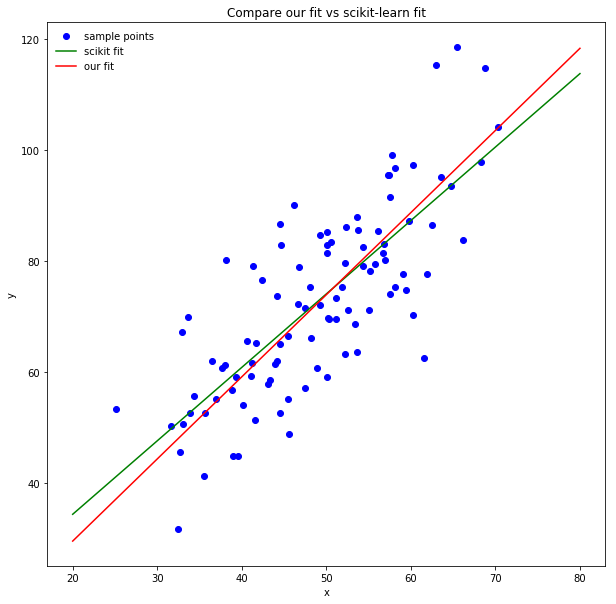

In [8]:
plt.figure(figsize=(10,10))
plt.plot(sample_x, sample_y, "bo", label="sample points")
plt.plot(predict_x, sci_predict(predict_x), "g-", label="scikit fit")
plt.plot(predict_x, our_predict(predict_x), "r-", label="our fit")
plt.legend(loc='upper left', frameon=False)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Compare our fit vs scikit-learn fit")

## Gradient descent animation

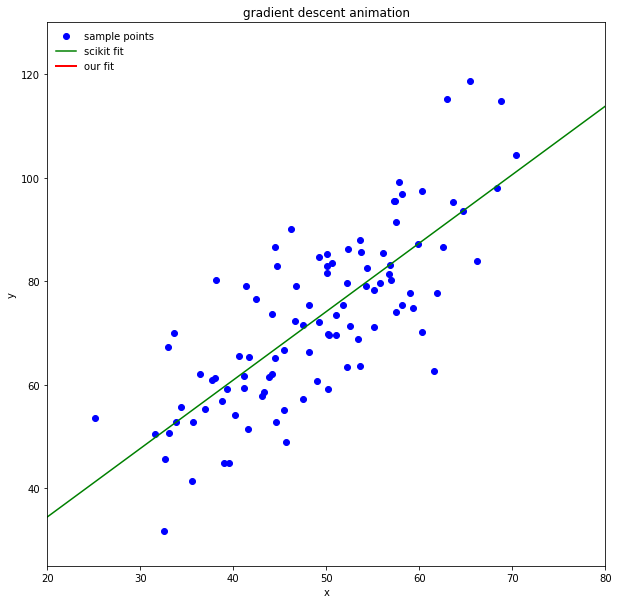

In [9]:
# create graph objects for animation
fig, ax = plt.subplots(figsize=(10,10))
plt.axis([20, 80, 25, 130])
plt.plot(sample_x, sample_y, "bo", label="sample points")
plt.plot(predict_x, sci_predict(predict_x), "g-", label="scikit fit")
line, = ax.plot([], [], "r-", lw=2, label="our fit")
plt.legend(loc='upper left', frameon=False)
plt.xlabel("x")
plt.ylabel("y")
plt.title("gradient descent animation")
points = np.genfromtxt("linear_regression_data.csv", delimiter=",")

In [10]:
# first prepare animation data
learning_rate = 0.00001
num_iterations = 250
b_init = 0
m_init = 0
b, m, b_intermediate, m_intermediate = our_fit(learning_rate, num_iterations, b_init, m_init)

def linear(b, m):
    return b + m * predict_x

# initialization function: plot the background of each frame
def init():
    line.set_data(predict_x, linear(b_init, m_init))
    return (line,)

# animation function. This is called sequentially
def animate(i):
    line.set_data(predict_x, linear(b_intermediate[i], m_intermediate[i]))
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
rc('animation', html='html5')
animation.FuncAnimation(fig, animate, init_func=init, frames=num_iterations, interval=20, blit=True)

## Example from Udacity

In [11]:
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])
# Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict(21.07931)
print("life expectancy of Laos is %f" % laos_life_exp)

life expectancy of Laos is 60.315647
